<a href="https://colab.research.google.com/github/ThalitaSaBR/KNN/blob/main/Learner_Notebook_Low_Code_Version_Customer_Personality_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
# uncomment and run the following line if using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/sample_data/Customer_Personality_Segmentation.csv", sep="\t")

data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [ ]:
# creating a copy of the data
data = data.copy()

## **Data Overview**

#### Viewing the first and last 5 rows of the dataset

In [ ]:
data.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [ ]:
data.tail(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
2235             0             0         0              3         11         0  
2236             1             0         0              3         11         0  
2237             0             0         0              3         11         0  
2238             0             0         0              3         11         0  
2239             0             0         0              3         11         1

#### Calculating the age of the customer using the "Year Birth"

In [ ]:
import pandas as pd
from datetime import datetime

# Calcular o ano atual
current_year = datetime.now().year

# Criar uma nova coluna 'Age' com a idade do cliente
# This cell should be placed before the cell that drops the 'Year_Birth' column.
data["Age"] = current_year - data["Year_Birth"]

# Exibir as primeiras linhas para ver o resultado
print(data[["Year_Birth", "Age"]].head())

# (Opcional) Exibir estatísticas descritivas da idade
print("\nIdade média dos clientes:", round(data["Age"].mean(), 1))

KeyError: 'Year_Birth'

In [ ]:
data.shape

(2240, 30)

- The dataset has 2240 rows and 30 columns.

#### **Question 1**: What are the data types of all the columns?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [ ]:
import pandas as pd

# Calcular a média da renda
average_income = data["Income"].mean()

# Exibir o resultado formatado
print(f"A renda média das famílias é: {average_income:.2f}")

A renda média das famílias é: 52247.25


#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
import pandas as pd


# Verificar valores ausentes
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:\n", missing_values)

# Tratar valores ausentes
for column in df.columns:
    if df[column].isnull().sum() > 0:  # se houver nulos
        if df[column].dtype in ['int64', 'float64']:
            # Para variáveis numéricas, substituir pela média
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            # Para variáveis categóricas, substituir pela moda (valor mais frequente)
            df[column].fillna(df[column].mode()[0], inplace=True)

# Confirmar que não há mais valores ausentes
print("\nApós o tratamento, valores ausentes por coluna:\n", df.isnull().sum())


Valores ausentes por coluna:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

Após o tratamento, valores ausentes por coluna:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Ki

#### **Question 4**: Are there any duplicates in the data?

In [ ]:
import pandas as pd

# Verificar duplicatas
duplicates = data.duplicated().sum()

print(f"Número de linhas duplicadas no dataset: {duplicates}")

# Se quiser ver as linhas duplicadas:
if duplicates > 0:
    print("\nExibindo as linhas duplicadas:")
    print(data[data.duplicated()])

# (Opcional) Remover duplicatas
# df = df.drop_duplicates()
# print("\nDuplicatas removidas. Novo tamanho do dataset:", df.shape)

Número de linhas duplicadas no dataset: 0


### Dropping columns which are irrelevant to our analysis.

In [ ]:
columns_to_drop = ['Dt_Customer','Year_Birth','ID','AcceptedCmp1', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Education', 'Marital_Status']
data.drop(columns=columns_to_drop, inplace=True)

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [ ]:
data.shape

(2216, 18)

#### PLotting the histogram of each column.

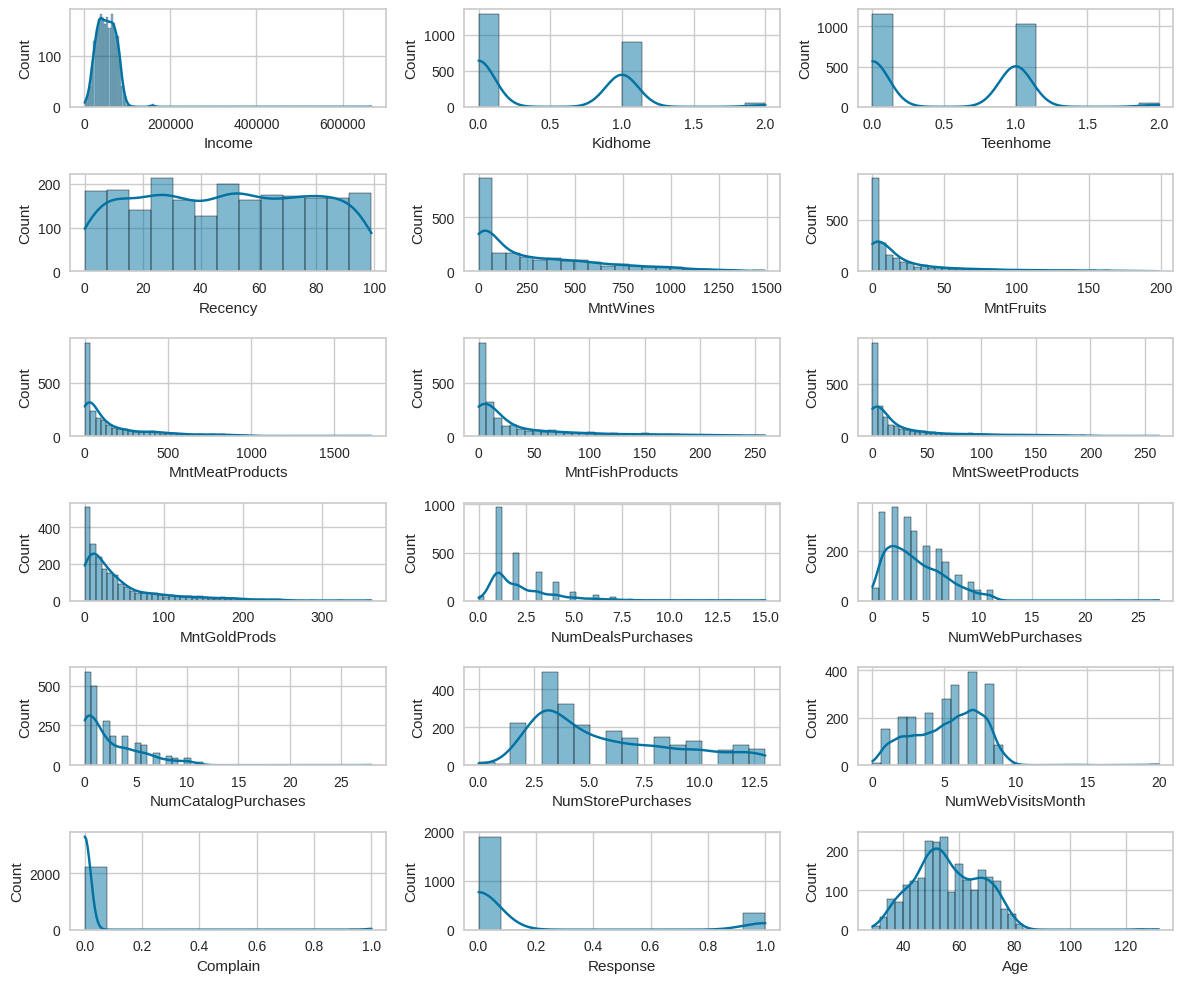

In [ ]:
# defining the figure size
plt.figure(figsize=(12, 10))

for i, feature in enumerate(data.'______'): #iterating through each column
    plt.subplot(6, 3, i+1)                  # assign a subplot in the main plot
    sns.histplot(data= '______', x= '_______', kde = True)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

#### PLotting the boxplot of each column.

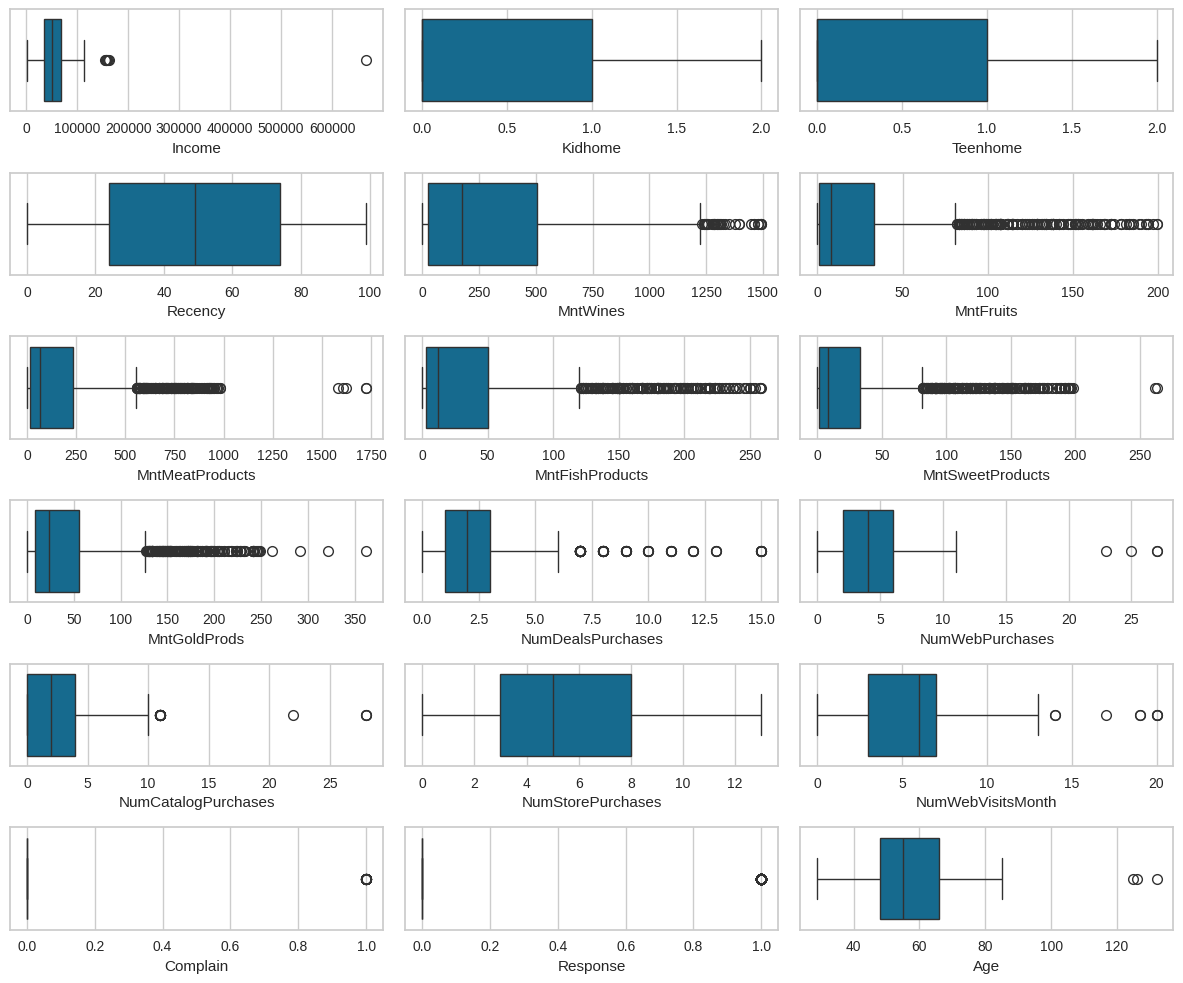

In [ ]:
# defining the figure size
plt.figure(figsize=(12, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(data.columns):    # iterating through each column
    plt.subplot(6, 3, i+1)                     # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the boxplot

plt.tight_layout();   # to add spacing between plots

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

**Let's check for correlations.**

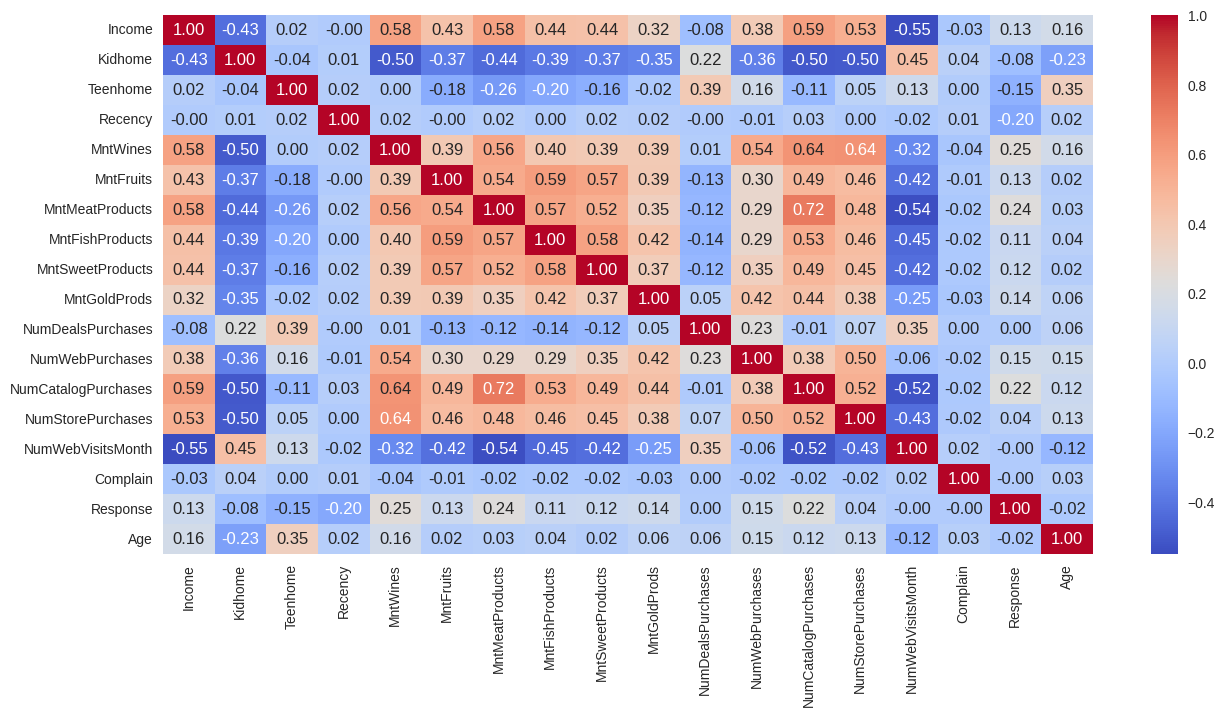

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.'________')
plt.show()

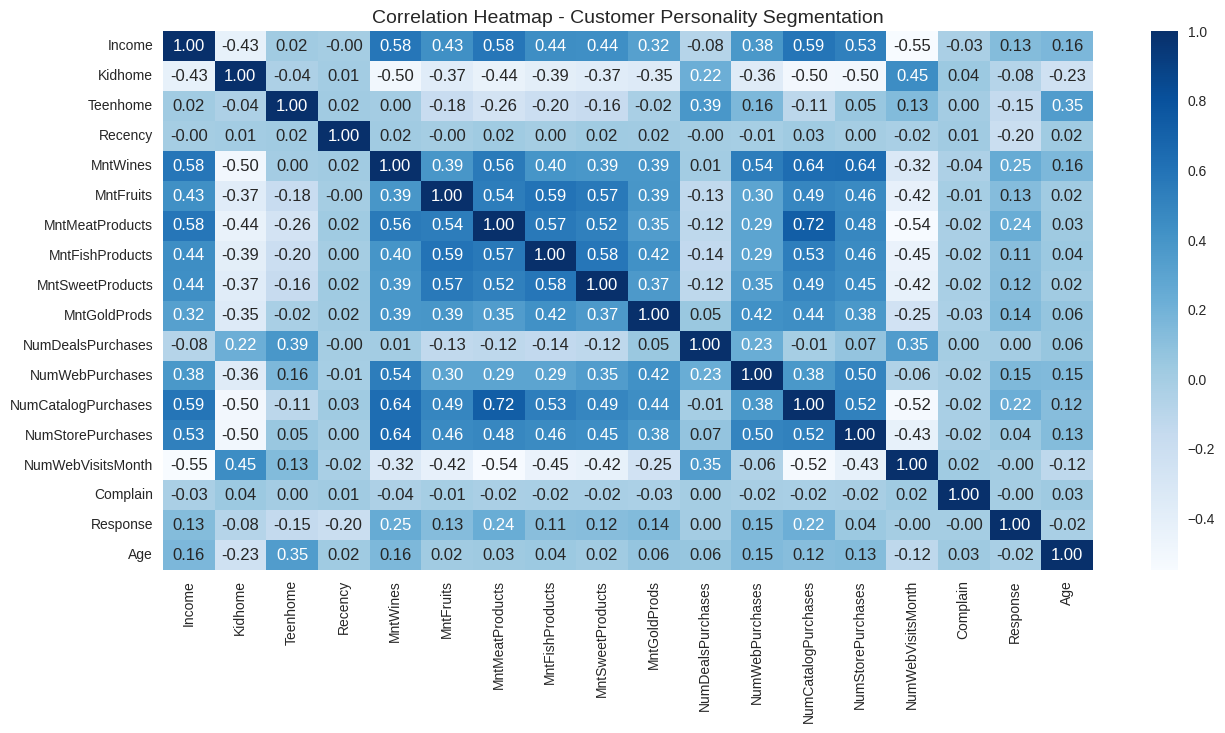

In [ ]:
# Calcular a matriz de correlação
corr = data.corr()

# Plotar o heatmap em tons de azul
plt.figure(figsize=(15, 7))
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")
plt.title("Correlation Heatmap - Customer Personality Segmentation", fontsize=14)
plt.show()

**Let's check for pairplots.**

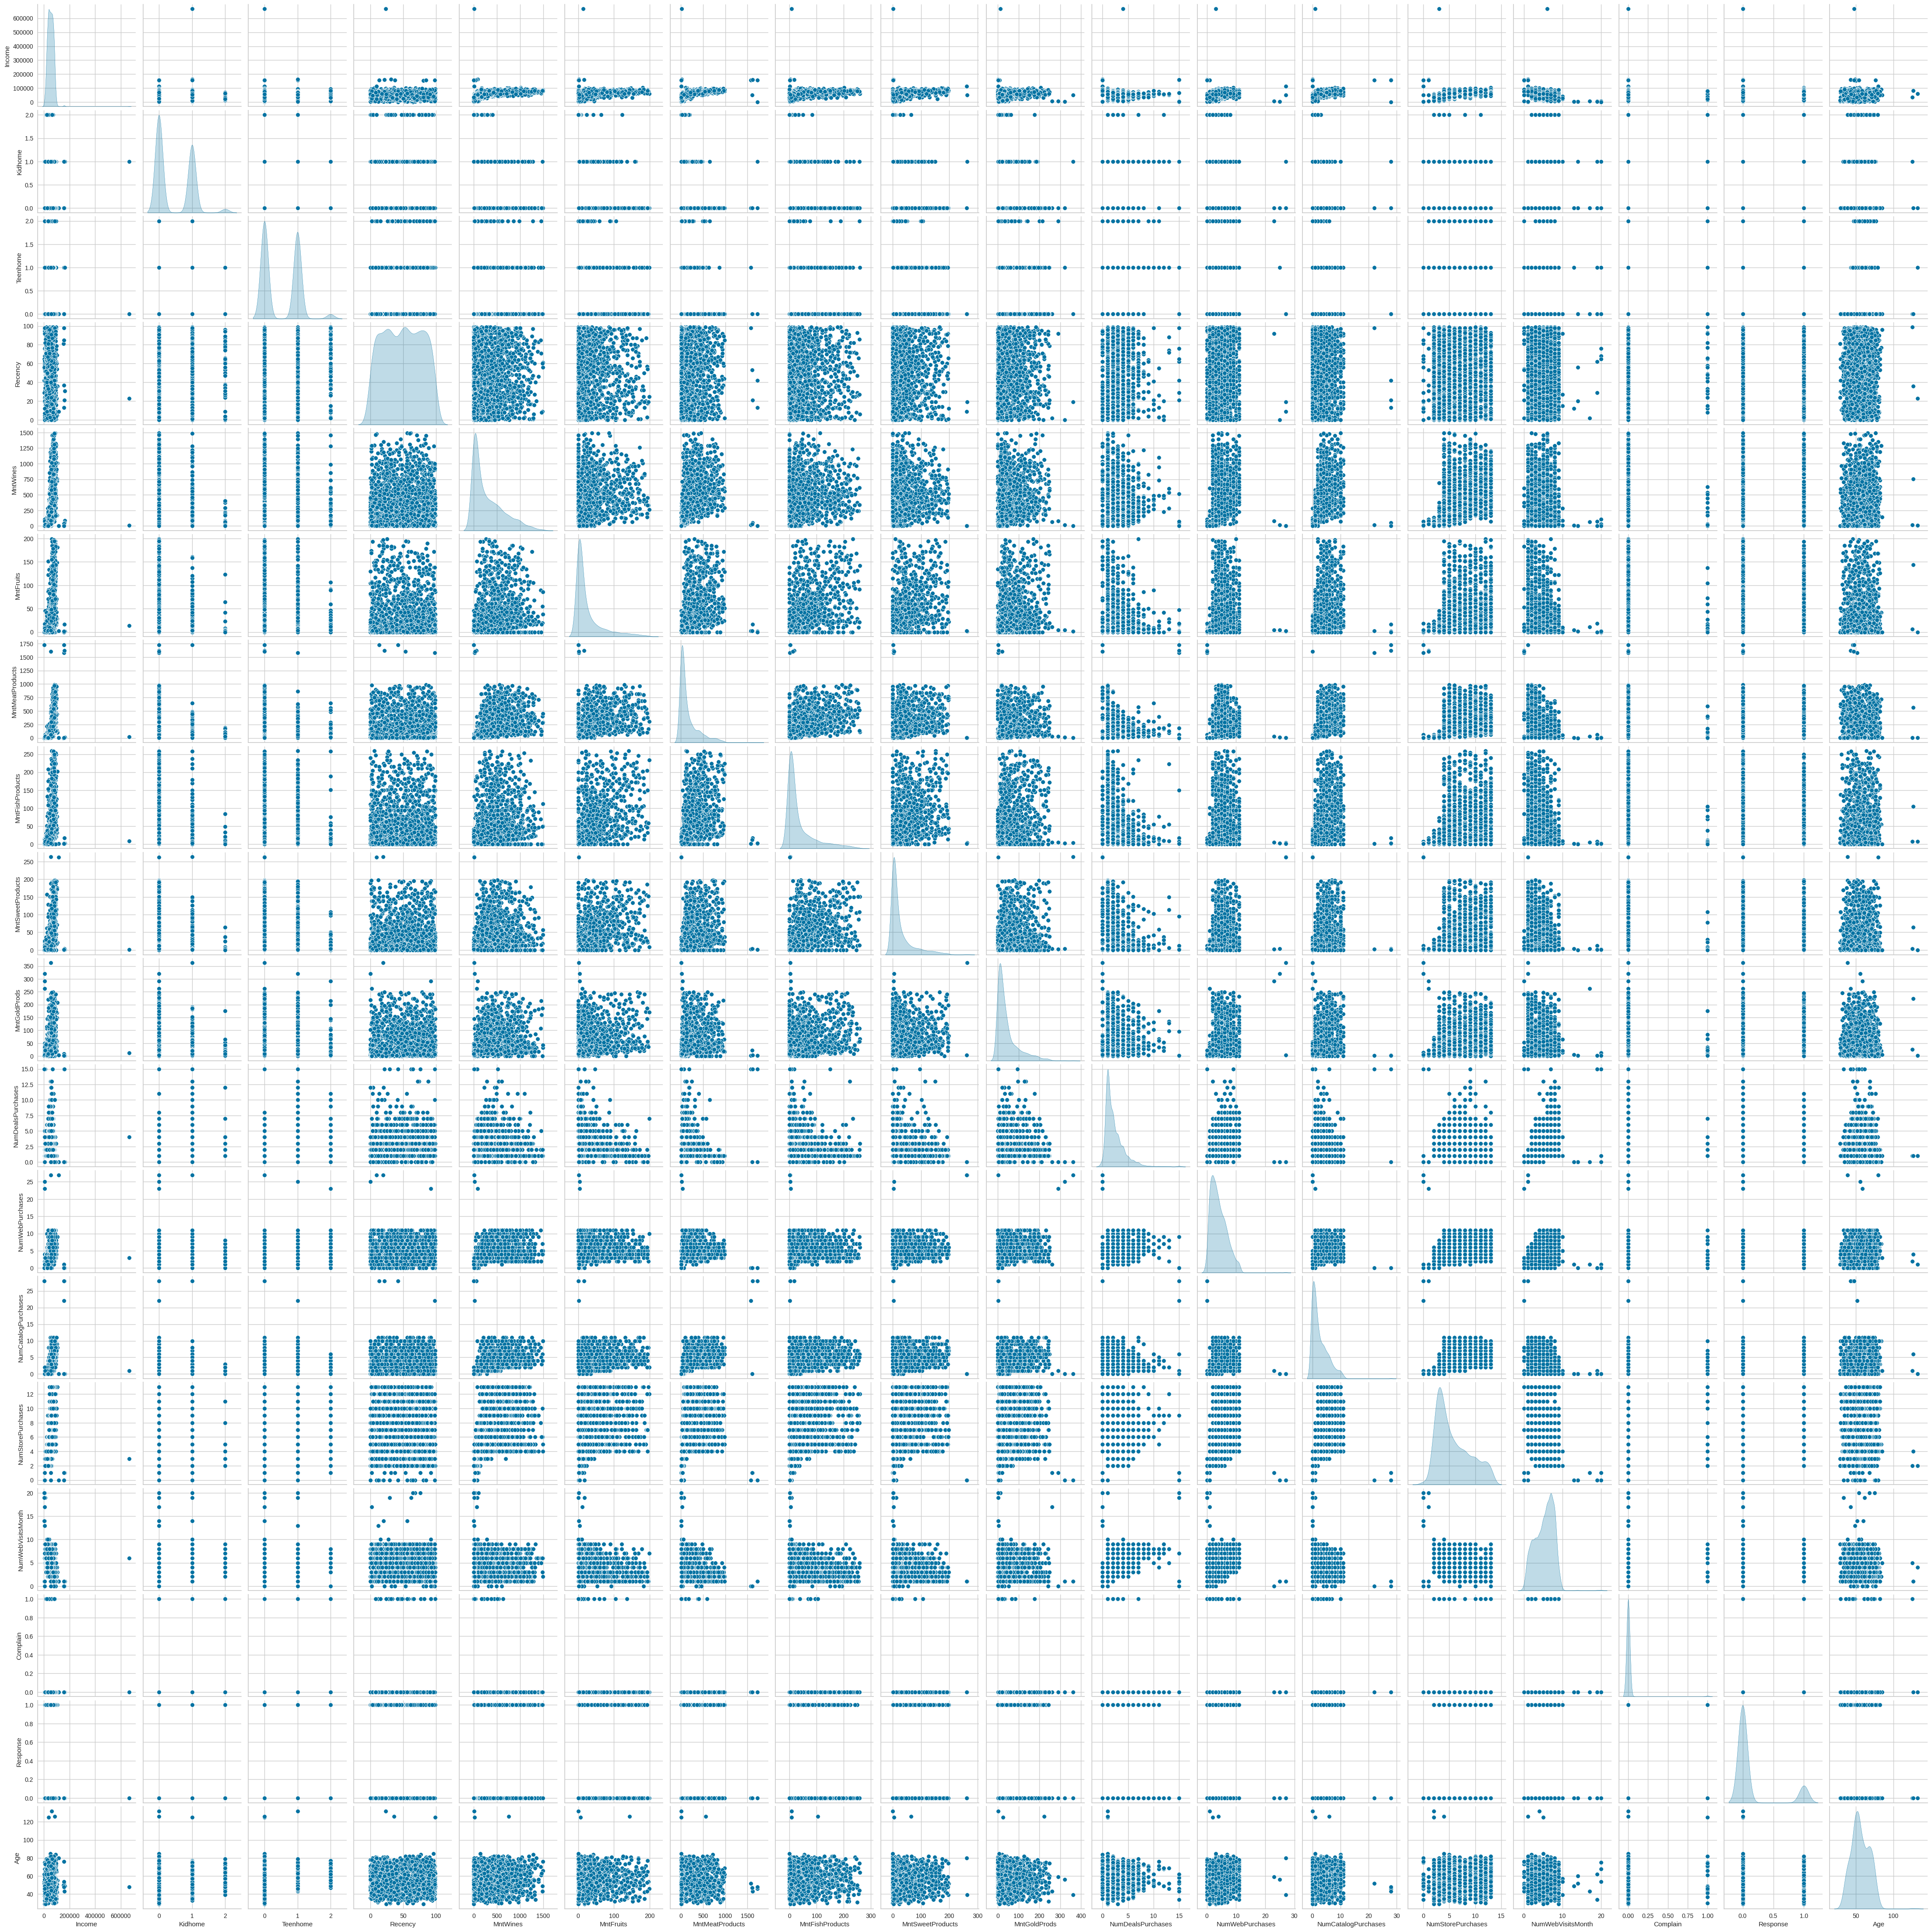

In [ ]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

## **Data Preprocessing**

### Scaling

- Let's scale the data before we proceed with clustering.

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = data.copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

## **K-means Clustering**

In [ ]:
k_means_data = subset_scaled_data.copy() # Do not change this code. This will be used later in cluster profiling

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

Number of Clusters: 2 	WCSS: 29497.83267168062
Number of Clusters: 3 	WCSS: 26230.953250524173
Number of Clusters: 4 	WCSS: 24836.896859862467
Number of Clusters: 5 	WCSS: 23798.277261996
Number of Clusters: 6 	WCSS: 22905.84442110616
Number of Clusters: 7 	WCSS: 21971.851315941876
Number of Clusters: 8 	WCSS: 19867.370105770795
Number of Clusters: 9 	WCSS: 19202.03069031792
Number of Clusters: 10 	WCSS: 18789.91617319814


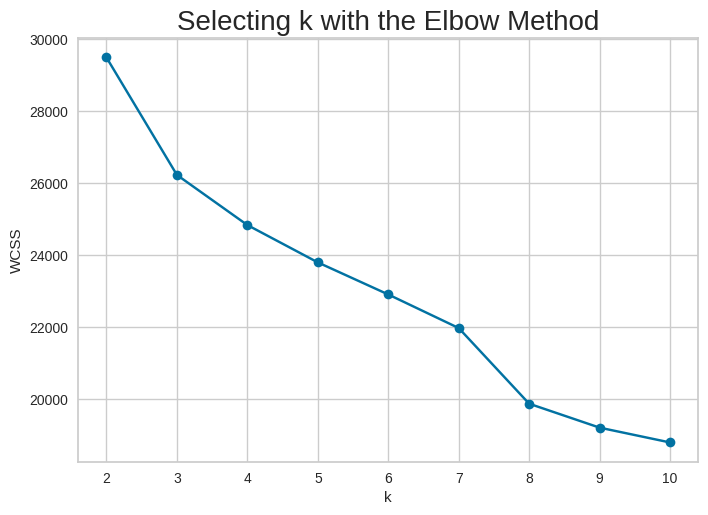

In [ ]:
clusters = range(2, 11)
wcss_k8 = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1) # initialize the kmeans model
    model.fit(k_means_data) # fit the kmeans model on the scaled data.
    wcss = model.inertia_
    wcss_k8.append(wcss)

    print("Number of Clusters:", k, "\tWCSS:",wcss)

plt.plot(clusters, wcss_k8, "bx-", marker='o')
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

In [ ]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)       # initialize the kmeans model with the number o clusters.
    preds = clusterer.fit_predict(k_means_data)                  # Fit the kmeans model
    score = silhouette_score(k_means_data, preds)             # Check the silhoutte score against the predictions
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.2841615840327469)
For n_clusters = 3, the silhouette score is 0.21188098881925826)
For n_clusters = 4, the silhouette score is 0.14436960188728373)
For n_clusters = 5, the silhouette score is 0.13893785252436497)
For n_clusters = 6, the silhouette score is 0.14417992767975793)
For n_clusters = 7, the silhouette score is 0.14737205727097402)
For n_clusters = 8, the silhouette score is 0.1546250329419453)
For n_clusters = 9, the silhouette score is 0.1460290535353914)


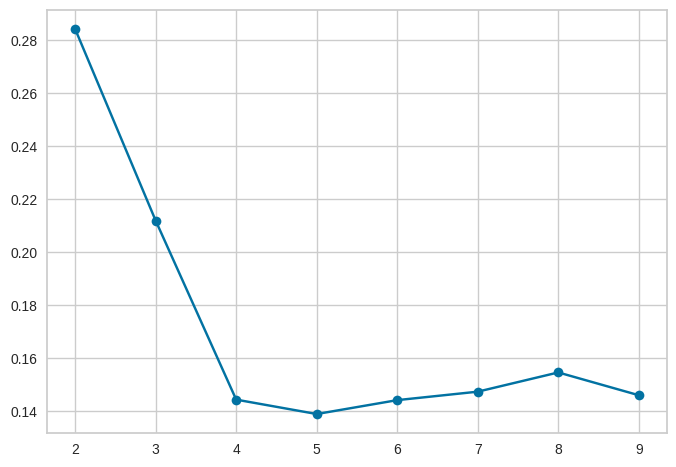

In [ ]:
plt.plot(cluster_list, sil_score, marker = 'o')
plt.show()

In [ ]:
# Group data by cluster and calculate the mean of each feature
cluster_profile = data1.groupby("K_means_segments").mean()

# Display the cluster profile
print("Cluster Profile (Mean values):")
display(cluster_profile)

# You can also calculate the median for a different perspective
# cluster_profile_median = data1.groupby("K_means_segments").median()
# print("\nCluster Profile (Median values):")
# display(cluster_profile_median)

Cluster Profile (Mean values):


Income   Kidhome  Teenhome    Recency    MntWines  \
K_means_segments                                                            
0                 41558.890481  0.647799  0.930818  50.861635   52.949686   
1                 78726.560693  0.029126  0.048544  56.660194  580.300971   
2                 49620.197141  0.961538  0.897436  46.628205  295.666667   
3                 29430.527896  0.875236  0.005671  48.240076   29.572779   
4                 45242.285714  0.666667  0.523810  53.047619  169.000000   
5                 65120.345399  0.179191  0.705202  50.277457  476.734104   
6                 76928.490886  0.014599  0.124088  50.715328  515.773723   
7                 58694.318375  0.037534  0.994638  47.892761  508.812332   
8                 77589.220238  0.035714  0.095238  39.613095  760.577381   

                   MntFruits  MntMeatProducts  MntFishProducts  \
K_means_segments                                                 
0                   3.698113        19.855346         5.568134   
1                  38.101942       472.907767        76.548544   
2                  12.493590       105.083333        20.108974   
3                   5.977316        24.296786         8.788280   
4                  24.190476       112.476190        25.761905   
5                  70.641618       239.196532        91.890173   
6                 111.839416       472.255474       137.875912   
7                  16.072386       124.817694        21.777480   
8                  60.398810       493.053571        85.690476   

                  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
K_means_segments                                                      
0                         3.874214     12.914046           2.027254   
1                        40.014563     59.344660           1.252427   
2                        16.128205     52.987179           6.961538   
3                         6.066163     16.623819           1.778828   
4                        17.523810     27.476190           2.333333   
5                        72.375723     89.000000           2.595376   
6                       117.372263     92.963504           1.102190   
7                        15.453083     57.109920           2.962466   
8                        59.952381     78.285714           1.202381   

                  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
K_means_segments                                                            
0                        1.958071             0.584906           3.396226   
1                        4.067961             6.262136           8.344660   
2                        5.692308             2.173077           5.833333   
3                        2.170132             0.474480           3.071834   
4                        3.619048             2.047619           5.238095   
5                        7.450867             3.965318           9.526012   
6                        4.693431             5.985401           8.357664   
7                        6.329759             3.219839           7.772118   
8                        5.791667             6.273810           7.702381   

                  NumWebVisitsMonth  Complain  Response        Age  
K_means_segments                                                    
0                          5.733753       0.0  0.031447  61.796646  
1                          2.150485       0.0  0.000000  58.538835  
2                          7.358974       0.0  0.288462  56.717949  
3                          6.924386       0.0  0.120983  46.378072  
4                          5.809524       1.0  0.142857  59.904762  
5                          4.774566       0.0  0.011561  55.132948  
6                          2.197080       0.0  0.058394  56.109489  
7                          5.541555       0.0  0.077748  61.967828  
8                          3.595238       0.0  1.000000  55.714286

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [ ]:
%%time
# Based on the elbow plot and silhouette scores, choose the appropriate number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0) # Replace _______ with the chosen number of clusters
kmeans.fit(k_means_data)

CPU times: user 13.6 ms, sys: 0 ns, total: 13.6 ms
Wall time: 15 ms


KMeans(n_clusters=9, random_state=0)

In [ ]:
# creating a copy of the original data
data1 = data.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_data["K_means_segments"] = kmeans.labels_
data1["K_means_segments"] = kmeans.labels_

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

**Let's create some plots on the original data to understand the customer distribution among the clusters in Kmeans.**

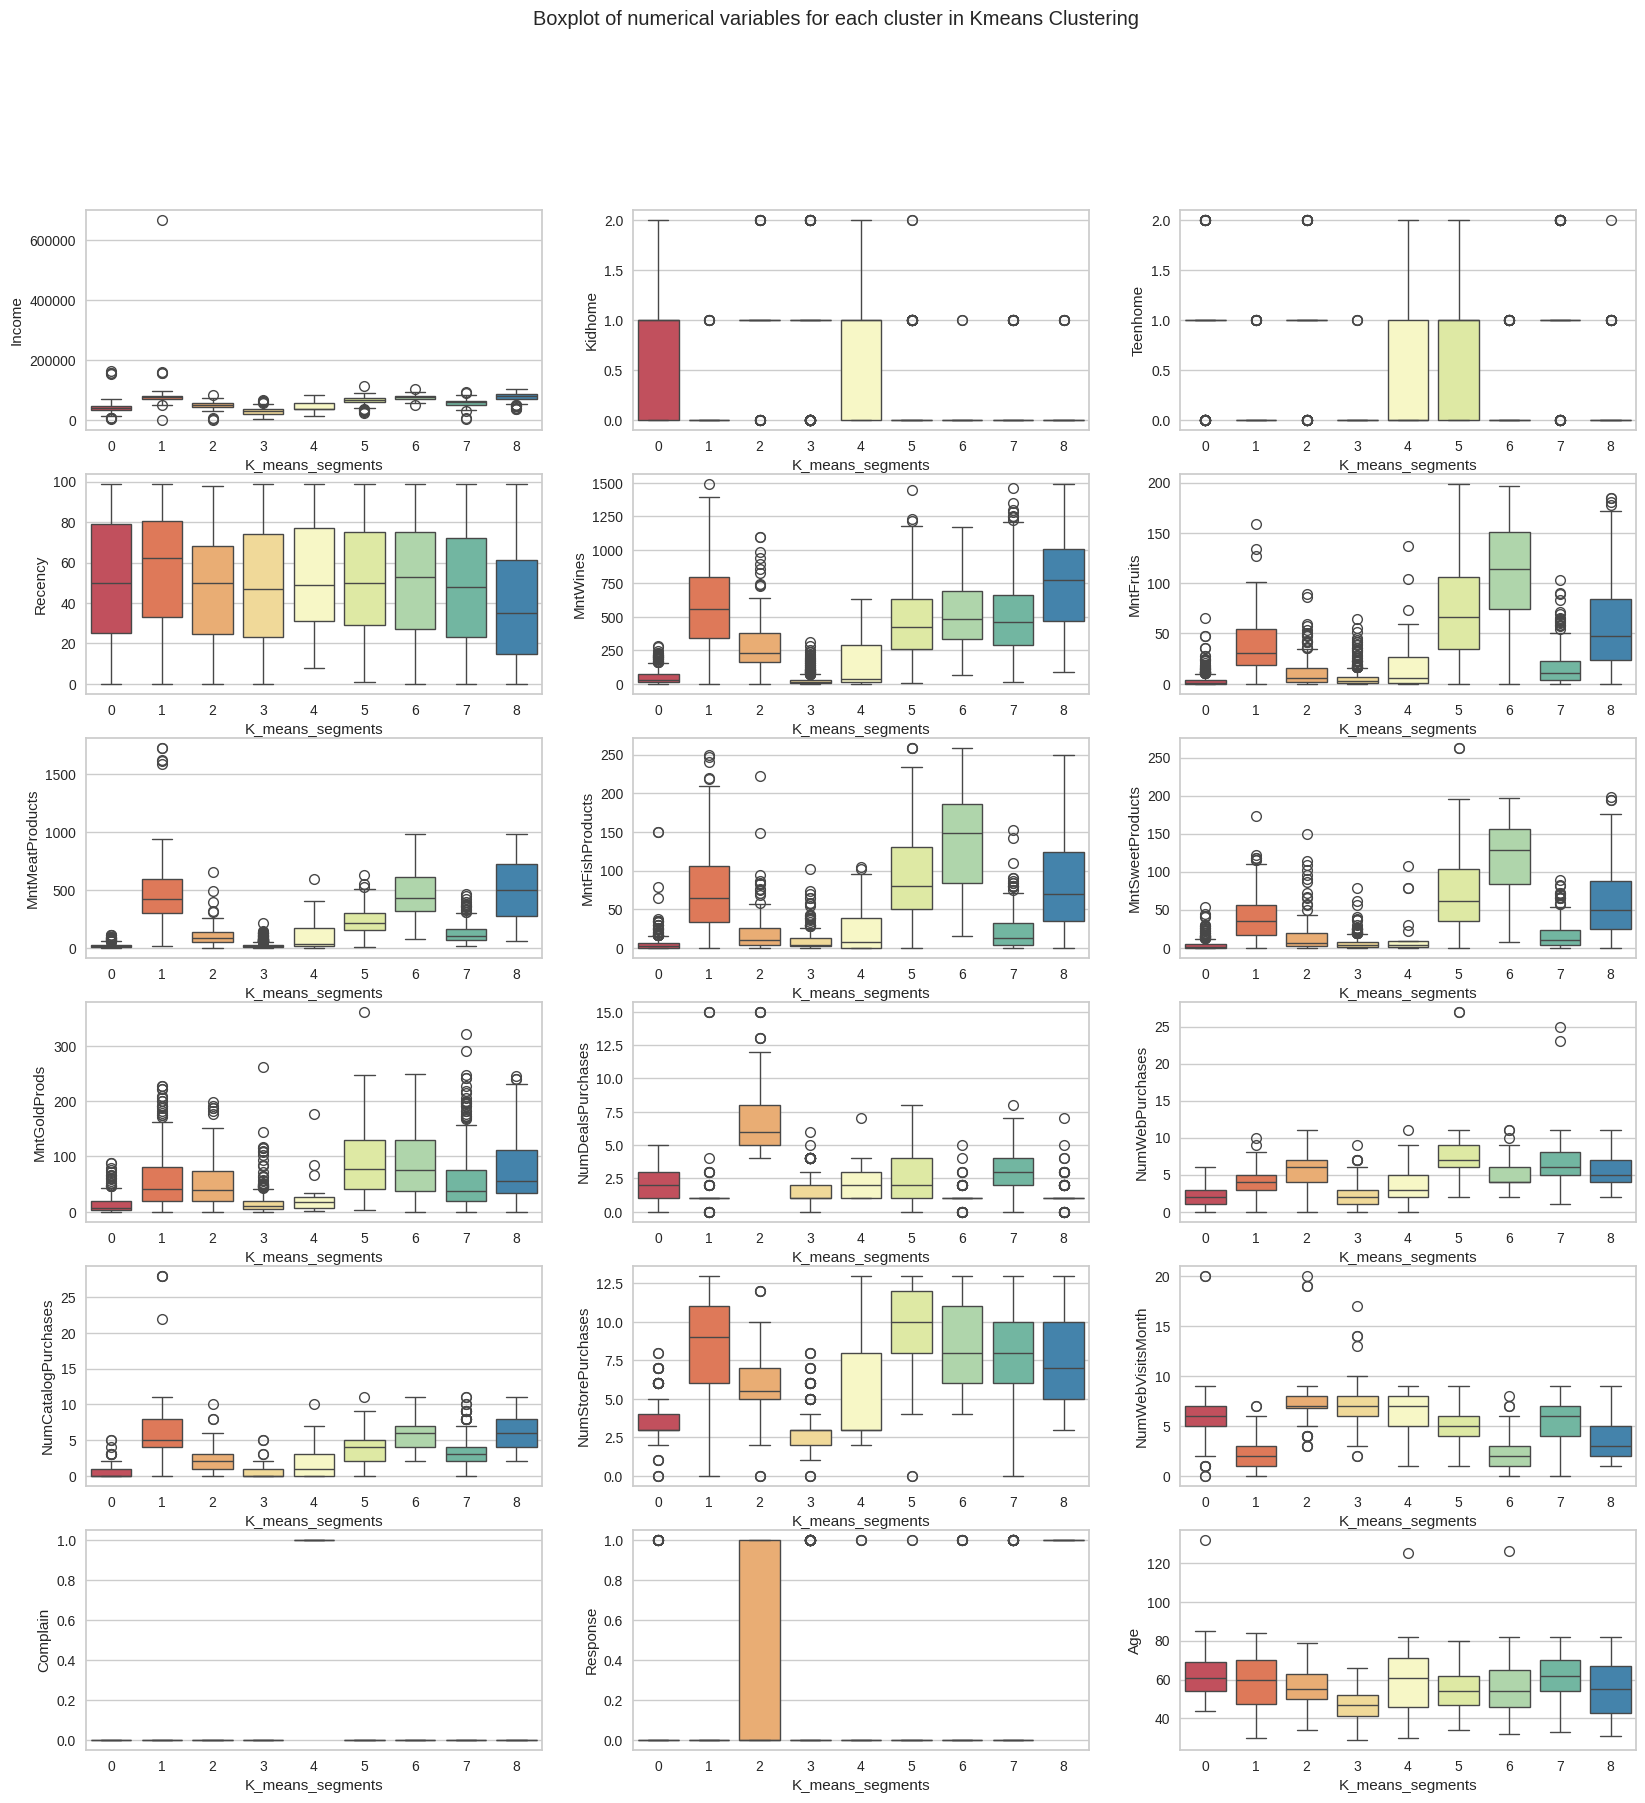

In [ ]:
plt.figure(figsize=(20, 20))  # Set the figure size for the plot
plt.suptitle("Boxplot of numerical variables for each cluster in Kmeans Clustering")  # Set the main title for the plot

# Iterate over each numerical variable in the dataframe
for i, variable in enumerate(data1.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)  # Create subplots in a 3x4 grid, starting from index 1
    sns.boxplot(data=data1, x="K_means_segments", y=variable, palette='Spectral') # Hint: X = clusters, Y = columns.

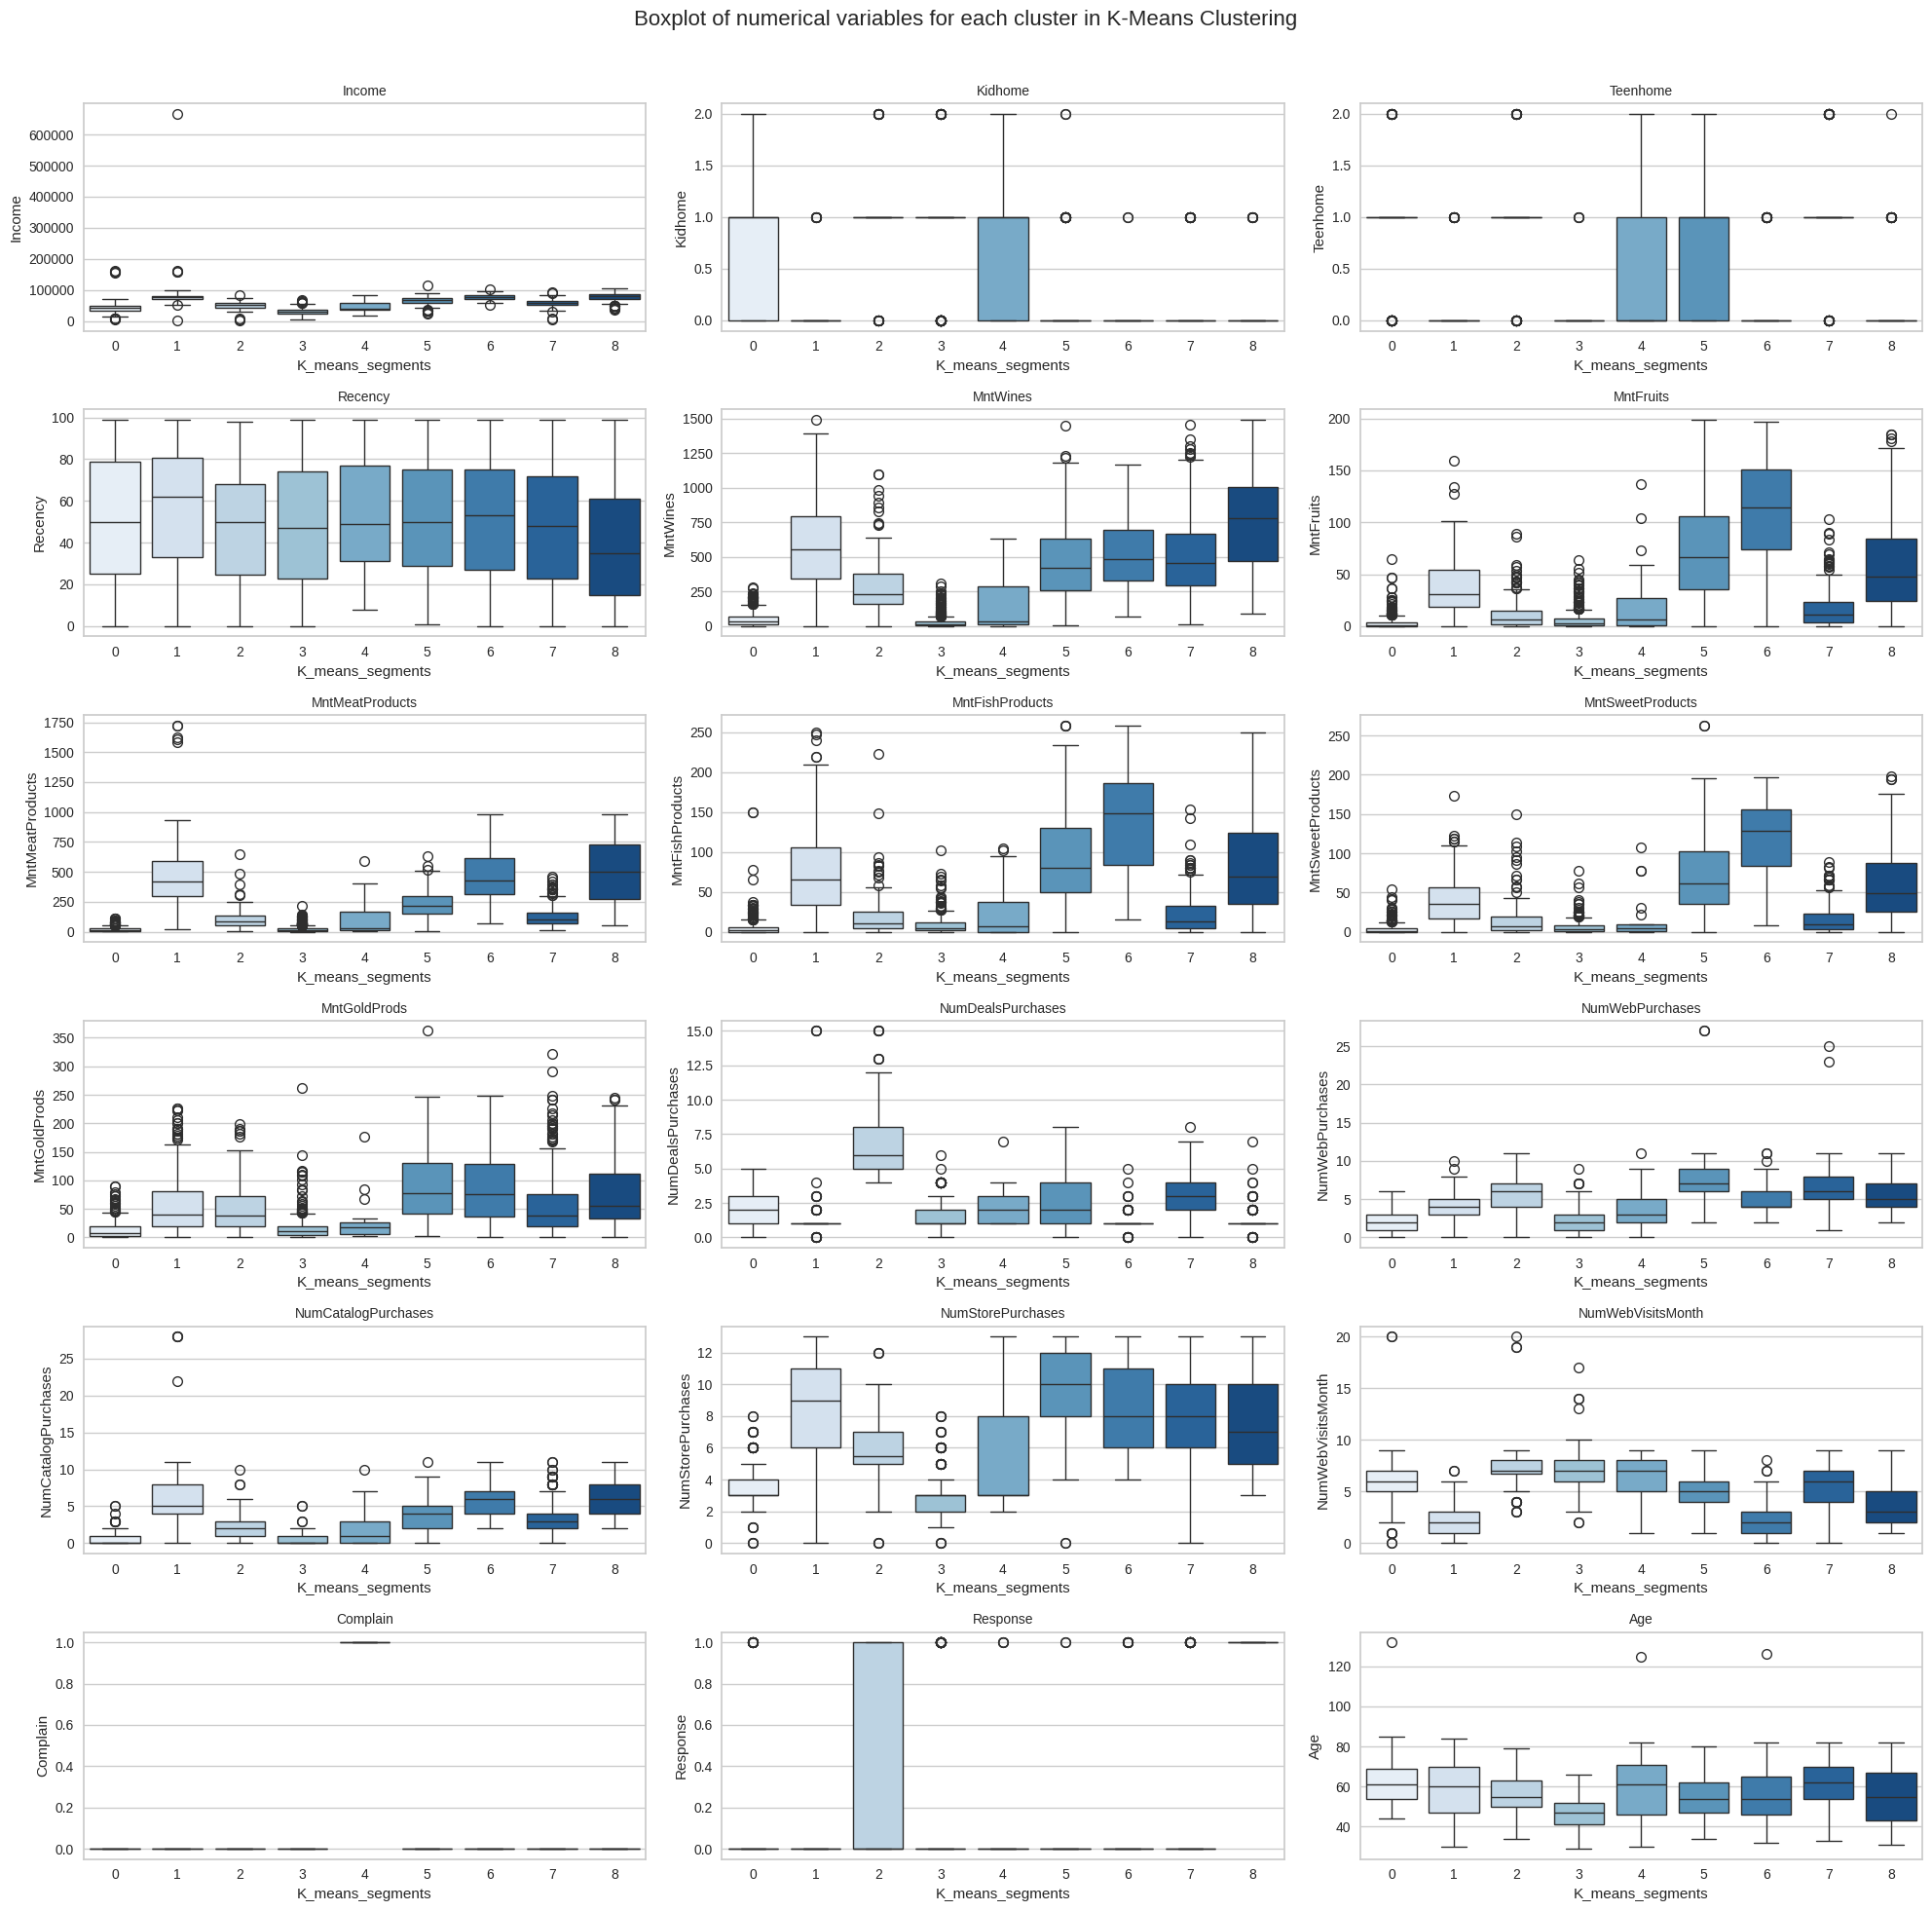

In [ ]:
plt.figure(figsize=(20, 20))  # Define o tamanho da figura
plt.suptitle("Boxplot of numerical variables for each cluster in K-Means Clustering", fontsize=16)

# Loop para criar os boxplots das variáveis numéricas
for i, variable in enumerate(data1.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)  # Cria subplots organizados em uma grade
    sns.boxplot(
        data=data1,
        x="K_means_segments",
        y=variable,
        palette="Blues"  # 🎨 Paleta em tons de azul
    )
    plt.title(variable, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Ajusta os espaçamentos
plt.show()


#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

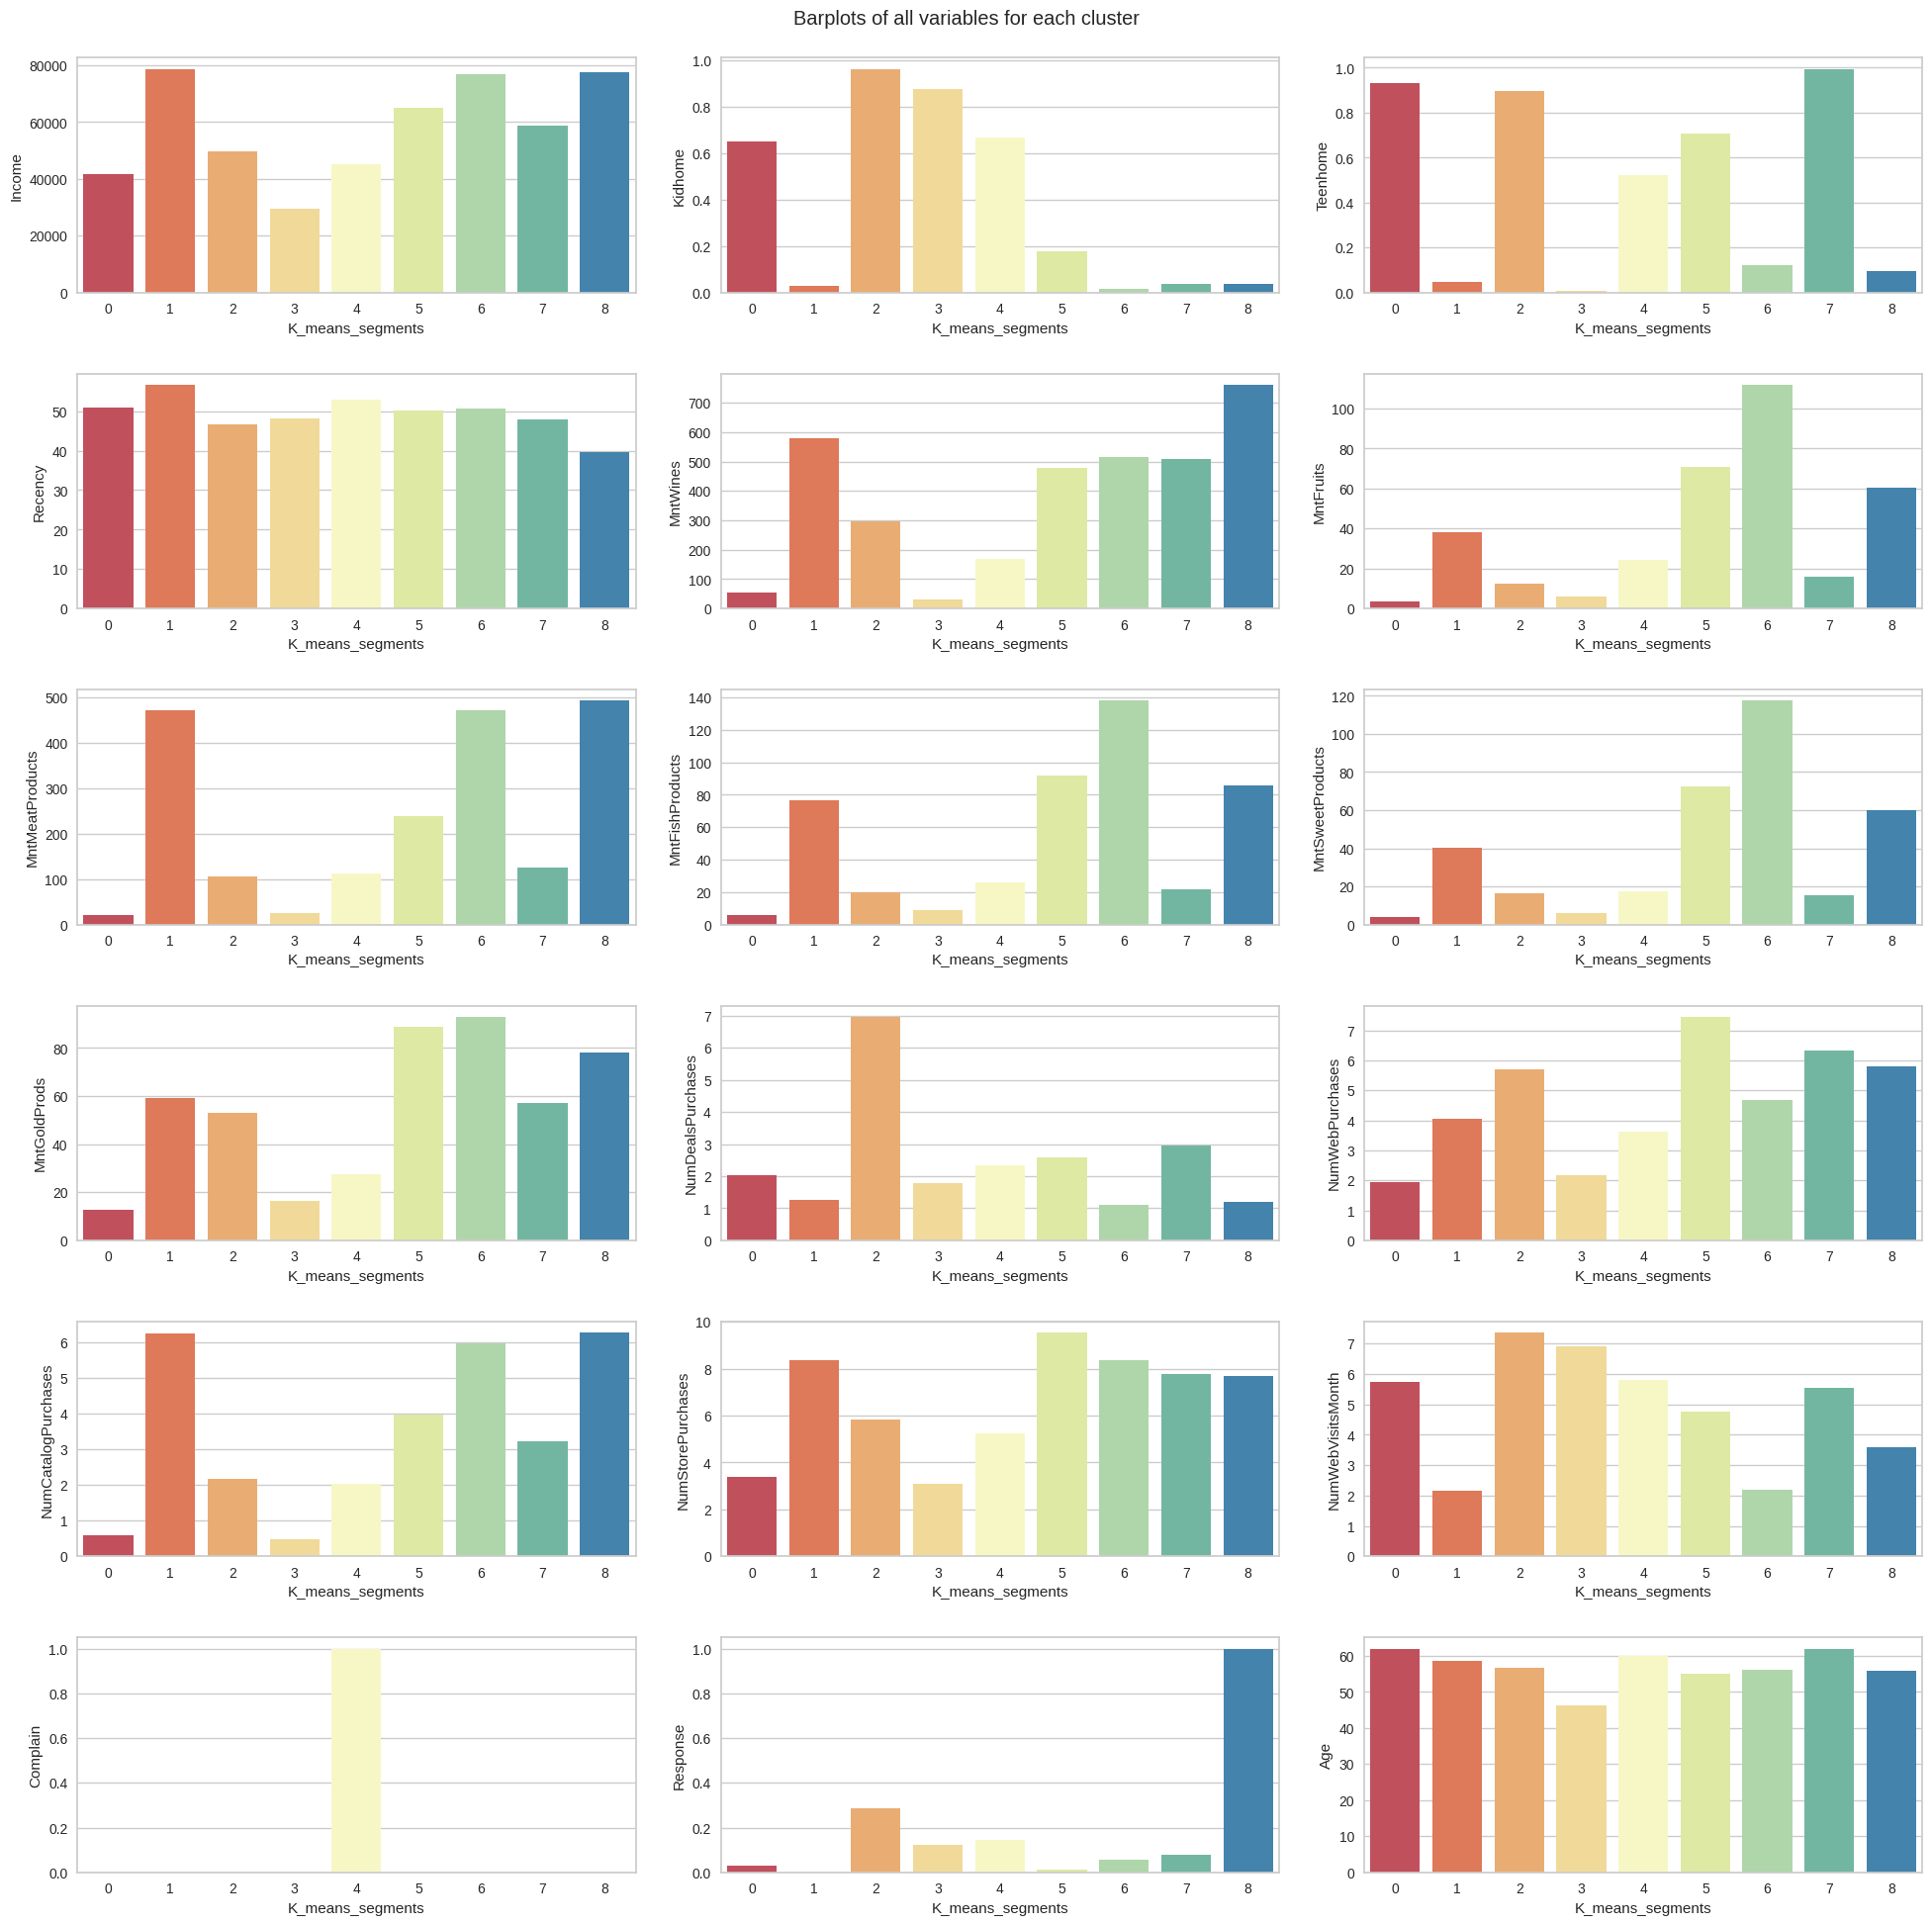

In [ ]:
# Prepare for plotting barplots of numerical variables for each cluster
plt.figure(figsize=(20, 20))  # Set the figure size for the plot
plt.suptitle("Barplots of all variables for each cluster")  # Set the main title for the plot

for i, variable in enumerate(data1.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)
    sns.barplot(data=data1, x="K_means_segments", y=variable, palette='Spectral', errorbar=None)

plt.tight_layout(pad=2.0)

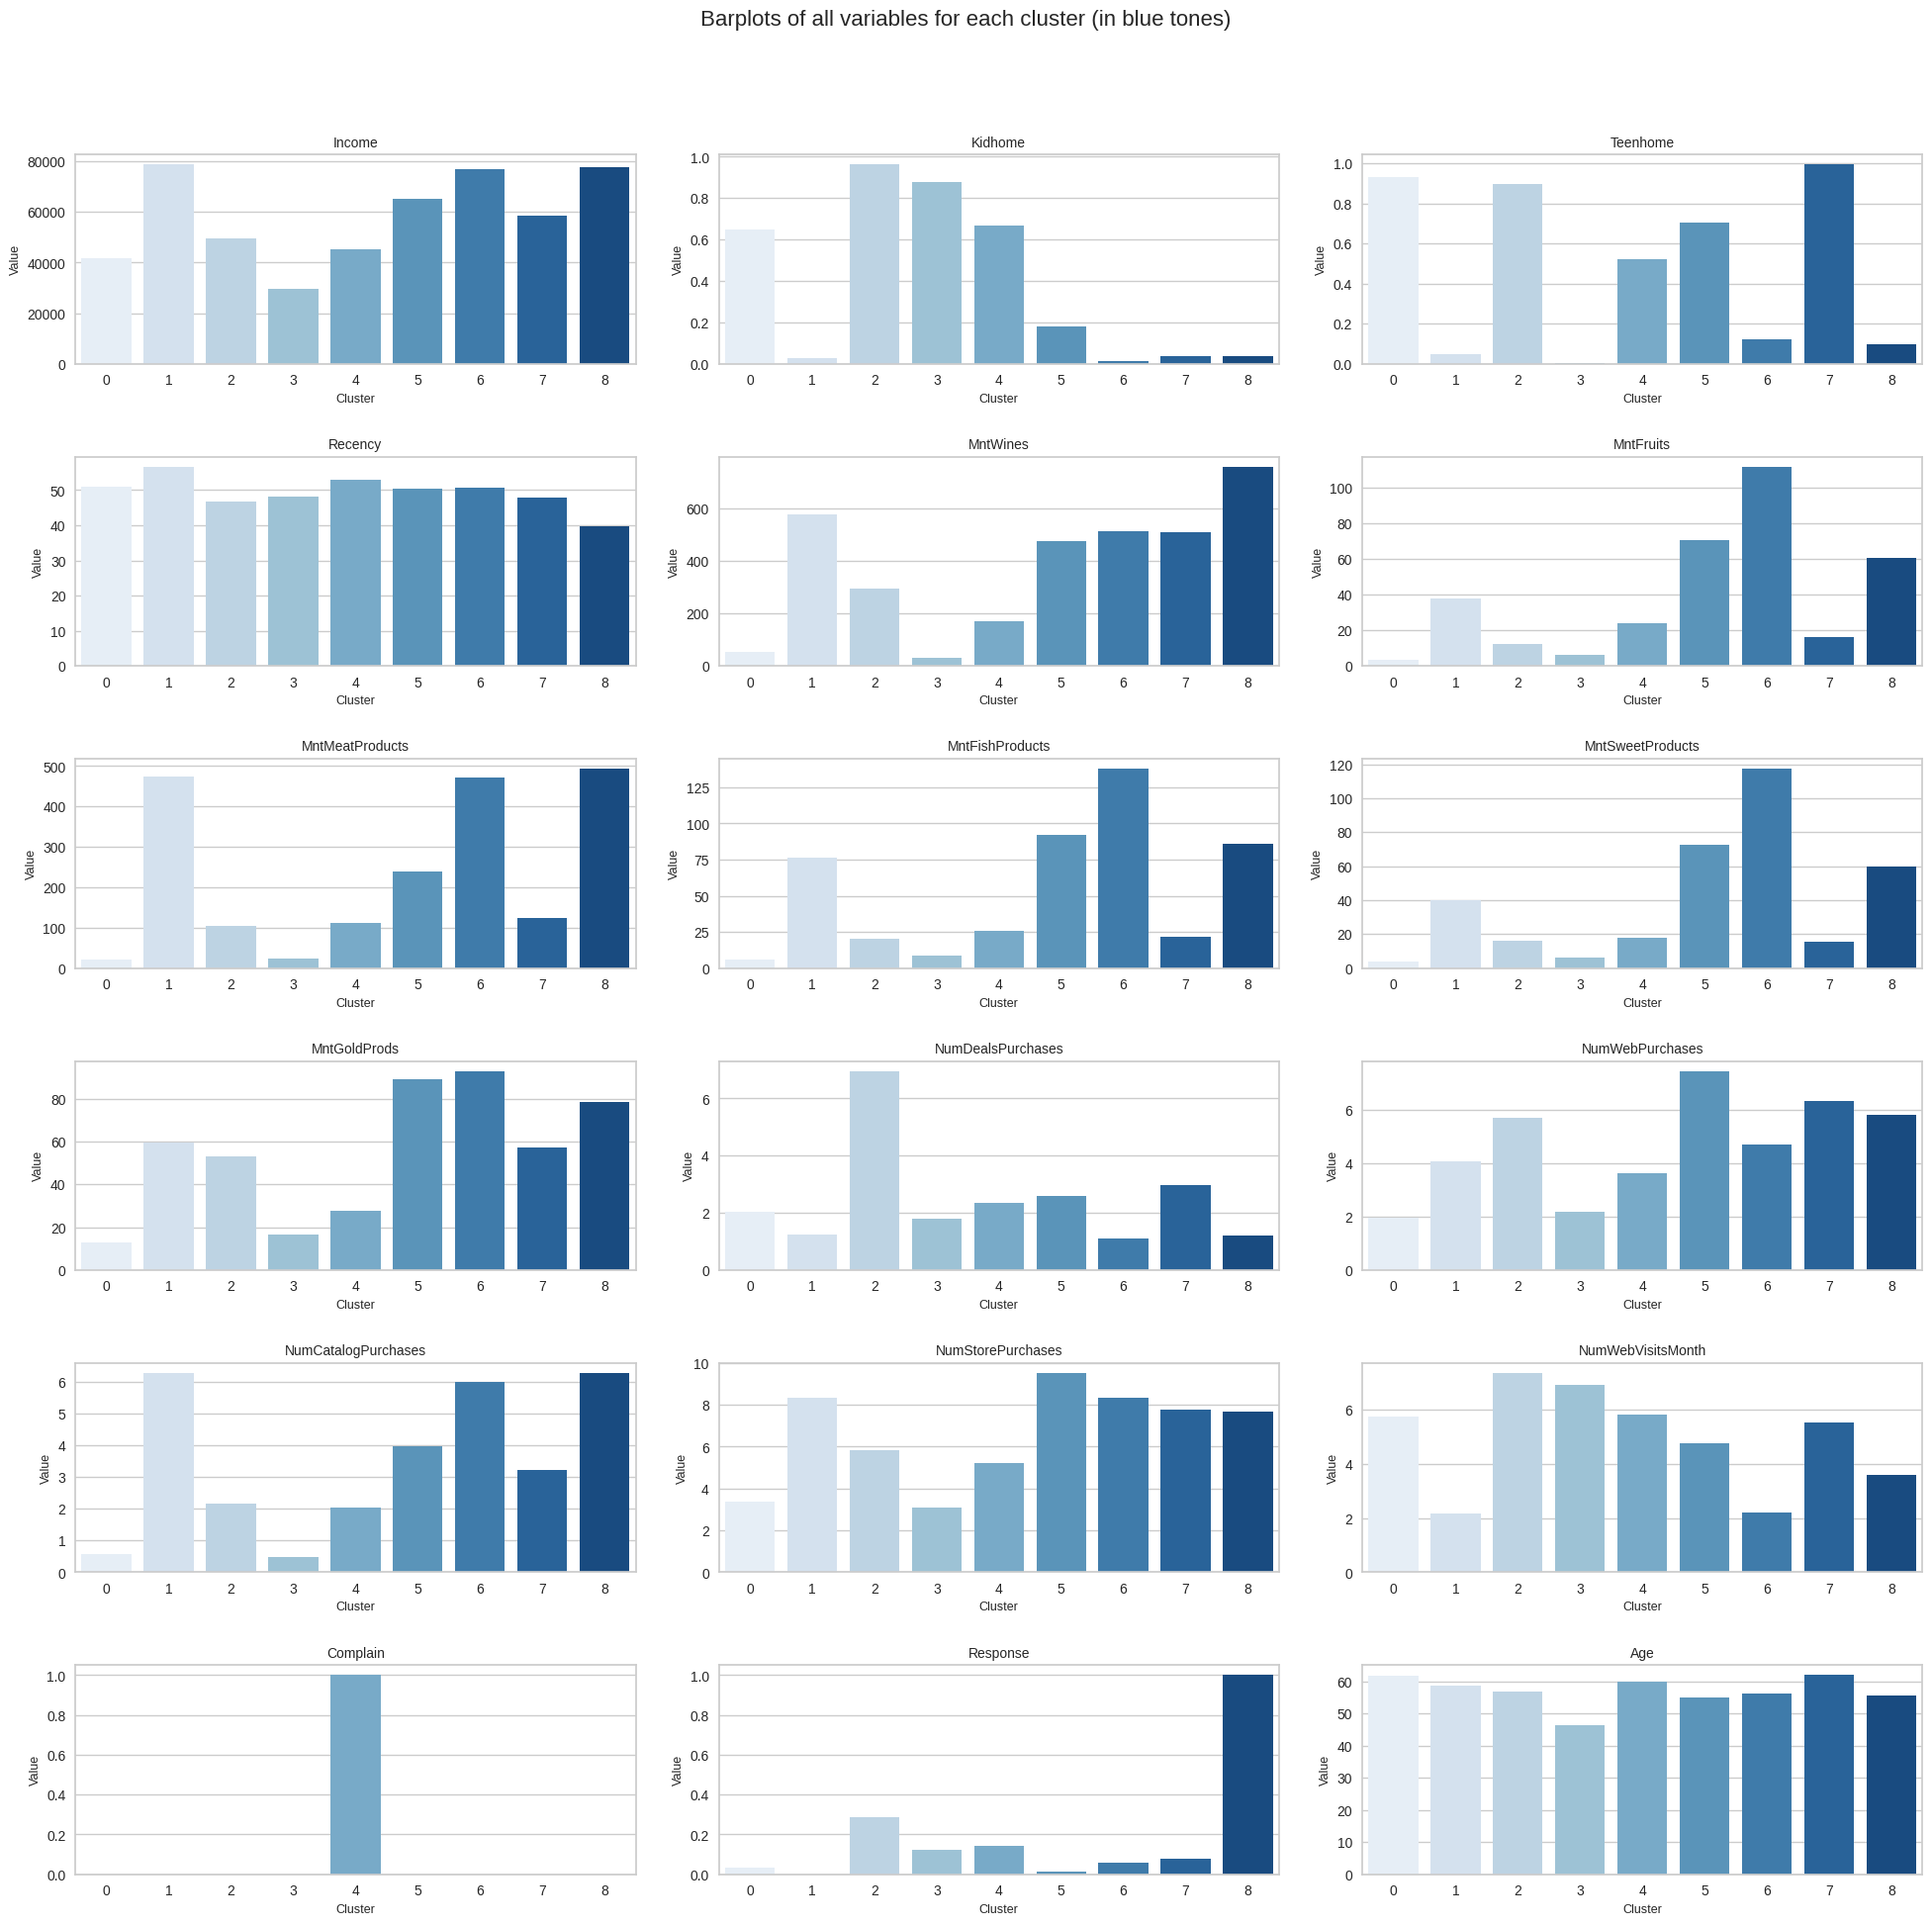

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define o tamanho da figura
plt.figure(figsize=(20, 20))
plt.suptitle("Barplots of all variables for each cluster (in blue tones)", fontsize=16)

# Cria os barplots em tons de azul
for i, variable in enumerate(data1.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)
    sns.barplot(
        data=data1,
        x="K_means_segments",
        y=variable,
        palette="Blues",   # 🎨 Tons de azul
        errorbar=None
    )
    plt.title(variable, fontsize=10)
    plt.xlabel("Cluster", fontsize=9)
    plt.ylabel("Value", fontsize=9)

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96], pad=2.0)
plt.show()


## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

Based on the insights from the `cluster_profile` and visualizations, what business recommendations can be provided?

Here are some potential business recommendations you can make based on the characteristics of each cluster identified through the K-Means clustering and visualization:

*   **Tailored Marketing Campaigns:** For clusters with high spending on specific product categories (e.g., wines, meat), design targeted marketing campaigns promoting those products. For clusters with low spending but high web visits, focus on online engagement and offers.
*   **Customer Retention Strategies:** Identify high-value clusters (e.g., high income, high total spending, low recency) and develop loyalty programs, exclusive offers, or personalized communication to retain them.
*   **Product Offering Optimization:** Analyze product preferences within each cluster to optimize inventory, introduce new products that align with their tastes, or adjust pricing strategies.
*   **Channel Optimization:** Based on the number of purchases through different channels (web, catalog, store), optimize resource allocation and marketing efforts for each channel within each cluster.
*   **Customer Service Improvements:** For clusters with a higher incidence of complaints, investigate the reasons and implement targeted improvements to customer service.
*   **Targeted Promotions:** For clusters that responded well to previous campaigns, continue targeting them with similar promotions. For clusters that didn't respond, consider different types of offers or communication channels.
*   **Identifying Potential High-Value Customers:** Analyze clusters with characteristics that might indicate potential for higher future spending (e.g., higher income but currently low spending) and develop strategies to nurture them.